# DATA IMPORTATION 



In [1]:
import pandas as pd
# Assuming the CSV file is in the same directory as your code file
file_path = "MS4S16_Dataset.csv"
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Pre-process the dataset and perform an Exploratory Data Analysis (EDA) of the data.

This should include:
• Splitting the dataset into a Training Set and a Test Set;
• Taking care of any missing, duplicated or outlier values;
• Transforming data, where appropriate to do so;
• Encoding categorical features;
• Performing feature engineering techniques such as feature extraction and selection;
• Producing appropriate and informative plots and tables for an exploratory analysis;
• Assessing statistical assumptions and inferences.



##  • Taking care of any missing, duplicated or outlier values;


In [2]:
df_cleaned = df.dropna()

In [3]:
from scipy.stats.mstats import winsorize

# Assuming 'df' is your DataFrame containing the dataset

# Select only the numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns

# Apply winsorization to each numerical column
for column in numerical_columns:
    df_cleaned[column] = winsorize(df_cleaned[column], limits=[0.05, 0.05])

# Now df contains winsorized values for all numerical columns, effectively handling outliers


C:\Users\neste\AppData\Local\Temp\ipykernel_21916\2292577931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = winsorize(df_cleaned[column], limits=[0.05, 0.05])


In [8]:
df_cleaned.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

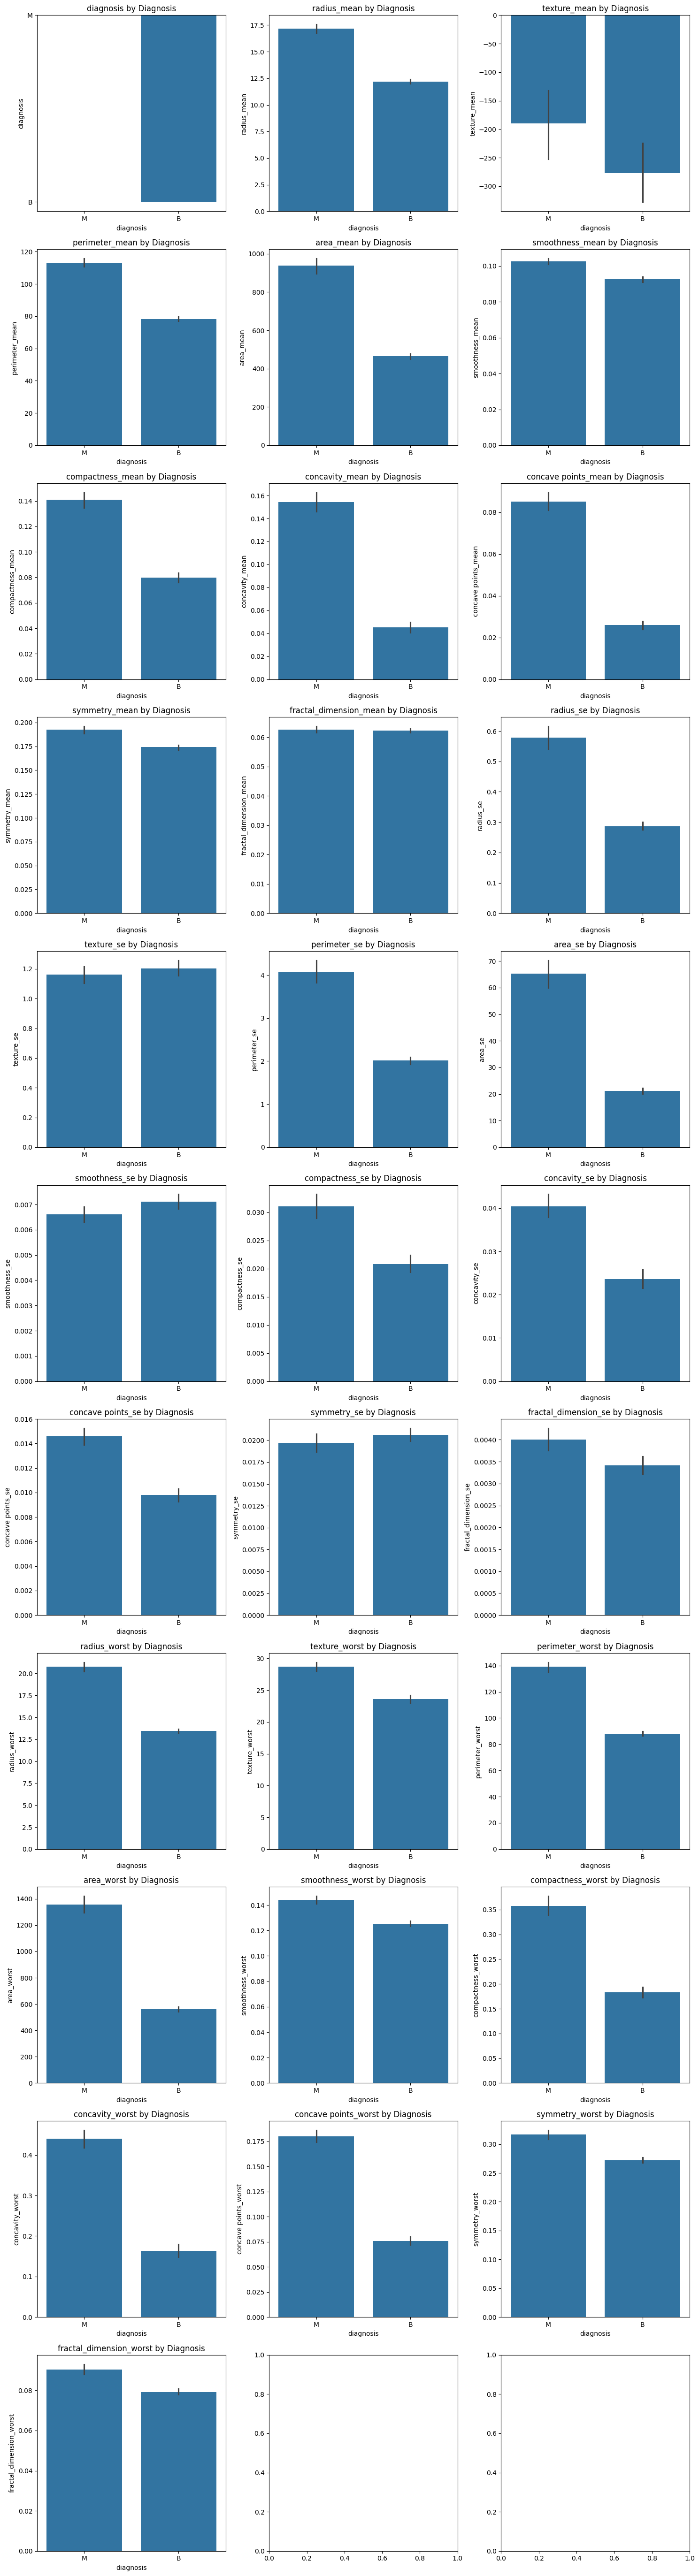

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'id' column from the list of columns
columns_to_plot = [col for col in df_cleaned.columns if col != 'id']

# Set up subplots
num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = [axes]

# Create bar plots for each column against 'diagnosis'
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    
    sns.barplot(x='diagnosis', y=column, data=df_cleaned, ax=axes[row][col])

    # Set plot title
    axes[row][col].set_title(f'{column} by Diagnosis')

# Adjust layout
plt.tight_layout()
plt.show()
